最小二乘法（least square method）就是基于均方误差最小化来进行模型求解的一种方法，寻找可使损失函数值最小的参数 $W$ 的过程称为最小二乘参数估计（parameter estimation）。
<br />模型函数: $$ Y = XW $$
<br />损失函数: $$ L(W) = (XW - Y)^T (XW - Y) = W^T X^T XW - 2 W^T X^T Y + Y^T Y $$
<br />对损失函数求关于$W$的偏导: $$ \frac{\partial L}{\partial W} = 2 X^T XW - 2 X^T Y $$
<br />梯度下降: $$ W^{(t+1)} = W^{(t)} - \alpha (2 X^T XW - 2 X^T Y) $$

model.W:
[[1.21626252]
 [3.05461608]]


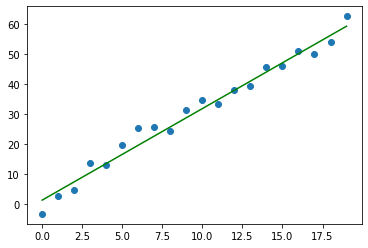

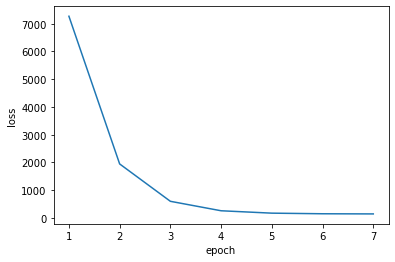

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class LinearRegression:

    def __init__(self):
        self.W = None
        self.learning_rate = 0.0001
        self.epochs = 1000

    def fit(self, X, Y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.W = np.random.randn(X.shape[1], 1)
        loss_history = []
        for i in range(self.epochs):
            self.W = self.W - self.learning_rate * (2 * X.T @ X @ self.W - 2 * X.T @ Y)
            loss_history.append(self.loss(self.W, X, Y))
            if i > 0 and loss_history[i - 1] > loss_history[i] and loss_history[i - 1] - loss_history[i] < 10:
                break
        return loss_history

    def loss(self, W, X, y):
        return (W.T @ X.T @ X @ W - 2 * W.T @ X.T @ y + y.T @ y)[0][0]

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_predict = X @ self.W
        return y_predict


def create_data(N, W):
    X = np.arange(N).reshape((-1, 1))
    y = W[0] + X @ W[1:, :] + np.random.randn(N, 1) * 3
    return X, y


N = 20
W = np.array([[2], [3]])

X, y = create_data(N, W)

model = LinearRegression()
loss_history = model.fit(X, y)
print('model.W:')
print(model.W)
y_predict = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict, color='g')
plt.show()

plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(1, len(loss_history) + 1), loss_history)
plt.show()